# Multiple linear regression

This was part of a econometrics course I participated in 2013/2014.


Let $T$ be the number of observations, $K$ the number of explanatory variables/ features,
the oberservations $X$, $Y$ and parameter $\beta$ ($\alpha$ intercept, $\beta_1^{},\dots,\beta_K^{}$ coefficents) to estimate and a residuum $u$ with

$$  Y = \left({\begin{array}{c}
   y_1^{}  \\
   \vdots  \\
   y_T^{}
  \end{array} }\right),\;\;
  X = \left({\begin{array}{cccc}
   1 & x_{1, 1}^{} &\dots & x_{1, K} \\
   \vdots & \vdots & \ddots & \vdots \\
   1 & x_{T, 1}^{} &\dots & x_{T, K}
  \end{array} }\right),\;\; 
  \beta = \left({\begin{array}{c}
   \alpha \\
   \beta_1^{}  \\
   \vdots  \\
   \beta_K^{}
  \end{array} }\right),\;\;
  u = \left({\begin{array}{c}
   u_1^{} \\
   \vdots  \\
   u_T^{}
  \end{array} }\right).$$

Then the model is $Y =X \beta + u$  with the following assumtions.

## Assumtions

### A (model)

* **A1 (true model)**: The model contains all explanory (or independent, exogene) variables and the used ones are not irrelevant.
* **A2 (linearity):** The real relation between X and Y is linear.
* **A3 (constant parameters):** the parameter $\beta$ is constant for each of the $T$ observations.

### B (residuals):  $u\sim \mathrm{N}(0,\Sigma)$ with $\Sigma = (\sigma^2\cdot (s = t))_{s,t = 1}^T\in\mathbb{R}^{\underline T\times\underline T}$

* **B1 (unbiased):** $\mathrm E u = 0$
* **B2 (homoskedasticity):** $\mathrm{Var}(u_t^{})= \sigma^2$ constant for $t\in\underline{T}$.
* **B3 (no autocorrelation):** $\mathrm{Cov}(u_t^{},u_s^{})=0$ for $s\neq t$, $s,t\in\underline T$.
* **B4 (normal distribution):** $u_t^{}$ is normal distributed.

## C (multiple regression):

* **C1 (non-random exogene variables):** $X$ is non-random and can be controlled in the experiment
* **C2 (free of perfect multikolinarity):** $X$ has full rang.

## Example of assumtion violations

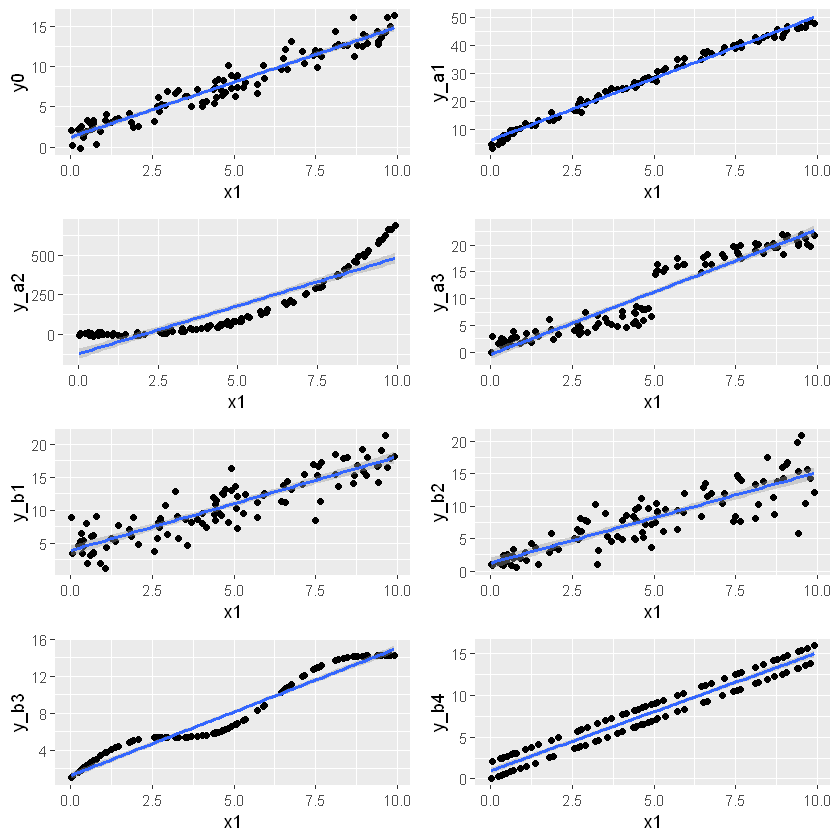

In [15]:
library(tidyverse) # general ds
library(gridExtra) # grid plot
set.seed(20)       # fixed seed for reproductability

# parameters
n = 100
a1 = 1.4
a2 = 3
a3 = 2
b1 = 1
b2 = 3
b3 = 2

# data
x1 = sort(runif(n, 0, 10))
x2 = sort(runif(n, 0, 10))
x3 = sort(runif(n, 0, 10))
y0 = a1 * x1 + b1 + rnorm(n)
y_a1 = a1 * x1 + b1 + rnorm(n) + a2 * x2 + b2
y_a1_tb = a1 * x1 + b1 + rnorm(n) + a2 * x2 + b2 + a3 * x3 + b3
y_a2 = a1 * x1 ^ 3/2 + b1 + rnorm(n,0,8)
y_a3 = a1* c(x1[x1 <=5],  x1[x1>5]+5) + b1 + rnorm(n)
y_b1 = a1 * x1 + b1 + rnorm(n, 3,2)
y_b2 = a1 * x1 + b1 + rnorm(n,0, sqrt(x1))
y_b3 = a1 * (sin(x1)+x1) + b1
y_b4 = a1 * x1 + 2 * rep(0:1,50)
df = data.frame(x1,y0,y_a1,y_a2,y_a3,y_b1,y_b2,y_b3,y_b4)

pl_fct = function(a = 2){
  df %>%
  ggplot(aes(x1, df[[a]])) + 
  geom_point() +
  geom_smooth(method ="lm") +
  ylab(names(df)[a])}
# plot of the examples of assumtion violation
assumptions_plot = do.call("grid.arrange", c(lapply(2:9, pl_fct), ncol=2))

# alternatively for A1 violation
p1 =     df %>%
    ggplot(aes(x1, y_a1)) + 
    geom_point() +
    geom_smooth(method ="lm", formula = y0~x)

## General analysis

### Plot with regression

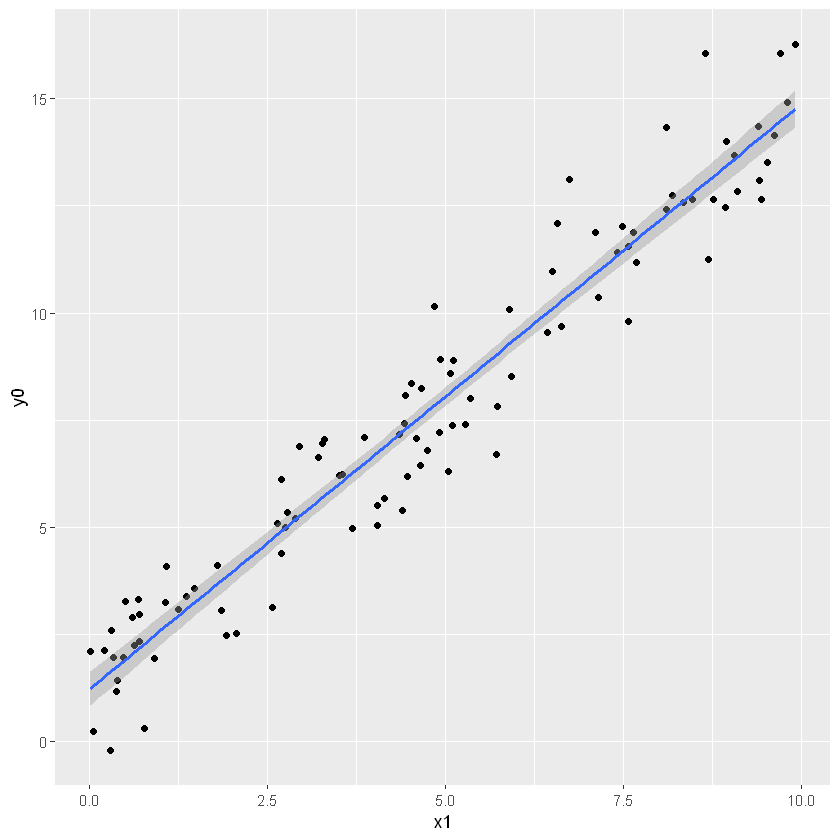

In [20]:
df %>% ggplot(aes(x = x1, y = y0)) + geom_point() + geom_smooth(method = 'lm')

### Printing results and summary


Call:
lm(formula = y_a1 ~ x1 + x2)

Coefficients:
(Intercept)           x1           x2  
      4.213        1.611        2.789  


(Intercept) 
    4.21271


Call:
lm(formula = y_a1 ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6102 -0.6552  0.1211  0.5155  2.1910 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.2127     0.2483  16.964  < 2e-16 ***
x1            1.6115     0.2501   6.443 4.53e-09 ***
x2            2.7887     0.2478  11.254  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9031 on 97 degrees of freedom
Multiple R-squared:  0.9955,	Adjusted R-squared:  0.9954 
F-statistic: 1.08e+04 on 2 and 97 DF,  p-value: < 2.2e-16


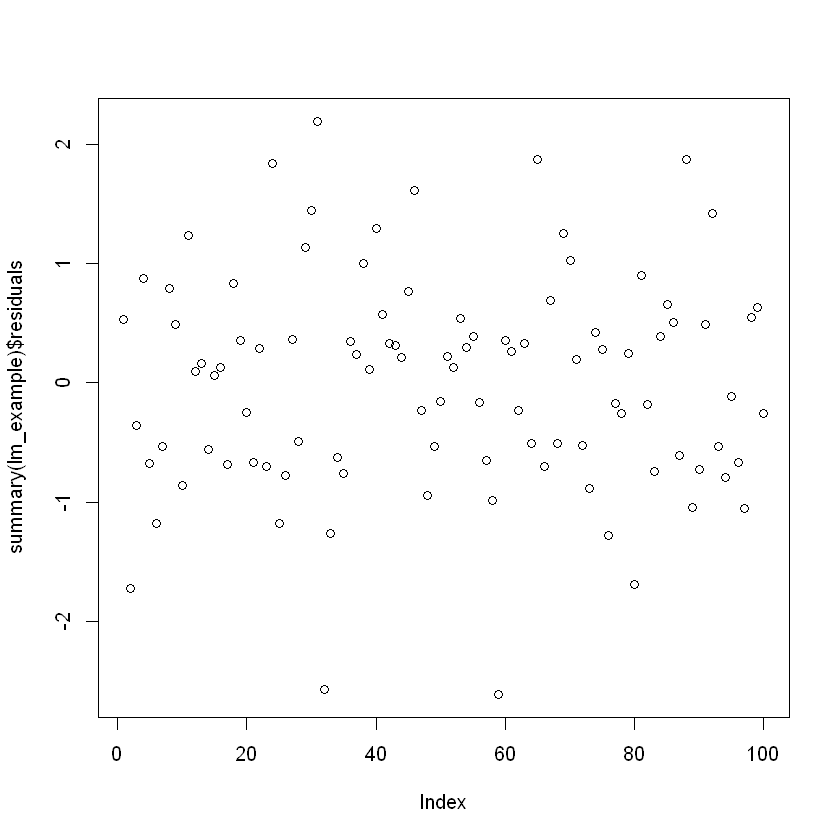

In [39]:
# fit lm model, also e.g. x1 * x2 assumes that x1, x2 are dependent
lm_example = lm(y_a1 ~ x1 + x2)


# possible calls
lm_example
lm_example$coefficients[1]
summary(lm_example)

plot(summary(lm_example)$residuals)


### Direct caluculation of estimator above.

least squares and maximum likelihood coincede in the situation. The coefficients which minimizes the mean squared error can be easily be calculated by the following formula:

$$ \beta = (X^T X)^{-1} X^Ty $$



In [93]:
X = matrix(cbind(rep(1,100),x1,x2), ncol = 3)
y = matrix(y_a1, ncol = 1)
b = solve(t(X) %*% X) %*% t(X) %*% y

writeLines(c('result to check: ',
             lm_example$coefficients,
             '\nresult by the formular above:',
             b,
             '\nAre they the same ?', mean(round(lm_example$coefficients,10) == round(b,10)) == 1
            )) 




result to check: 
4.21271046723769
1.61148404613044
2.7886930667313

result by the formular above:
4.21271046723754
1.61148404613061
2.78869306673122

Are they the same ?
TRUE


## Diagnosis

### A1
**indicators:**
* **R^2** (variation of Y explained by X / variation of Y) if small, maybe forget an exogene variable? ,         
* **AIC** (Akaike information criterium, measures the likelihood but considers the likelihood of a model) smaller for better model, 
* **SC**, **PC** 

In [6]:
SIC = function (x){
    AIC(x, k = log(n))} 

lm_small = lm(y_a1~ x1)
lm_medium = lm(y_a1~ x1 + x2)
lm_big = lm(y_a1~ x1 + x2 + x3)
model = list(lm_small,lm_medium, lm_big)

mod_AIC = sapply(model, AIC)
mod_BIC = sapply(model, BIC)
mod_SIC = sapply(model, SIC)
# each IC shows, that the medium model is the right model
data.frame(model = c("too small", "right", "too big"), mod_AIC, mod_BIC, mod_SIC)

model,mod_AIC,mod_BIC,mod_SIC
too small,349.8876,357.7031,357.7031
right,268.3531,278.7737,278.7737
too big,270.2512,283.2771,283.2771


In [4]:
# summary of examples of assumtion violations
ass_sum = list()
for(i in 2:9){
    ass_sum[[i-1]] = lm(df[[i]]~x1)
}

# or summary instead of AIC
ass_AIC = sapply(ass_sum, AIC)
# small AIC => better model
ass_BIC = sapply(ass_sum, BIC)
# SIC - Schwarz information criteria
ass_SIC = sapply(ass_sum, SIC)
# summary
IC = data.frame(assumptions = c("all", "no A1", "no A2", "no A3", 
                                "no B1", "no B2", "no B3", "no B4"),
                ass_AIC,ass_BIC, ass_SIC)
IC

assumptions,ass_AIC,ass_BIC,ass_SIC
all,305.8299,313.6454,313.6454
no A1,349.8876,357.7031,357.7031
no A2,1177.0401,1184.8557,1184.8557
no A3,457.8188,465.6343,465.6343
no B1,440.8867,448.7022,448.7022
no B2,463.0836,470.8991,470.8991
no B3,281.2544,289.0699,289.0699
no B4,289.7647,297.5802,297.5802


### tests  
* t-test $H_0^{}$: $\beta_k = 0$  
* F-test $H_0^{}$: $\beta_k=\beta_{\ell}^{}=0$ 
* non nested F-Test, J-Test


### Comparison of summaries

In [7]:
sumLM = function(arg){
    summary(lm(arg))
}

sumLM(y_a1 ~ x1)
sumLM(y_a1 ~ x1 + x2)
sumLM(y_a1 ~ x1 + x2 + x3)

#t.test(y_a1 ~ x1)
#anova(lm(y_a1~x1+x2+x3))


Call:
lm(formula = arg)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3147 -0.9191  0.0563  0.9103  3.3684 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.27920    0.25257   24.86   <2e-16 ***
x1           4.40580    0.04543   96.98   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.364 on 98 degrees of freedom
Multiple R-squared:  0.9897,	Adjusted R-squared:  0.9896 
F-statistic:  9405 on 1 and 98 DF,  p-value: < 2.2e-16



Call:
lm(formula = arg)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6102 -0.6552  0.1211  0.5155  2.1910 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.2127     0.2483  16.964  < 2e-16 ***
x1            1.6115     0.2501   6.443 4.53e-09 ***
x2            2.7887     0.2478  11.254  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9031 on 97 degrees of freedom
Multiple R-squared:  0.9955,	Adjusted R-squared:  0.9954 
F-statistic: 1.08e+04 on 2 and 97 DF,  p-value: < 2.2e-16



Call:
lm(formula = arg)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5944 -0.6544  0.1080  0.5090  2.1604 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.1814     0.2688  15.555  < 2e-16 ***
x1            1.6354     0.2627   6.226 1.26e-08 ***
x2            2.8680     0.3553   8.072 2.00e-12 ***
x3           -0.1011     0.3232  -0.313    0.755    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9073 on 96 degrees of freedom
Multiple R-squared:  0.9955,	Adjusted R-squared:  0.9954 
F-statistic:  7130 on 3 and 96 DF,  p-value: < 2.2e-16


### Critical values

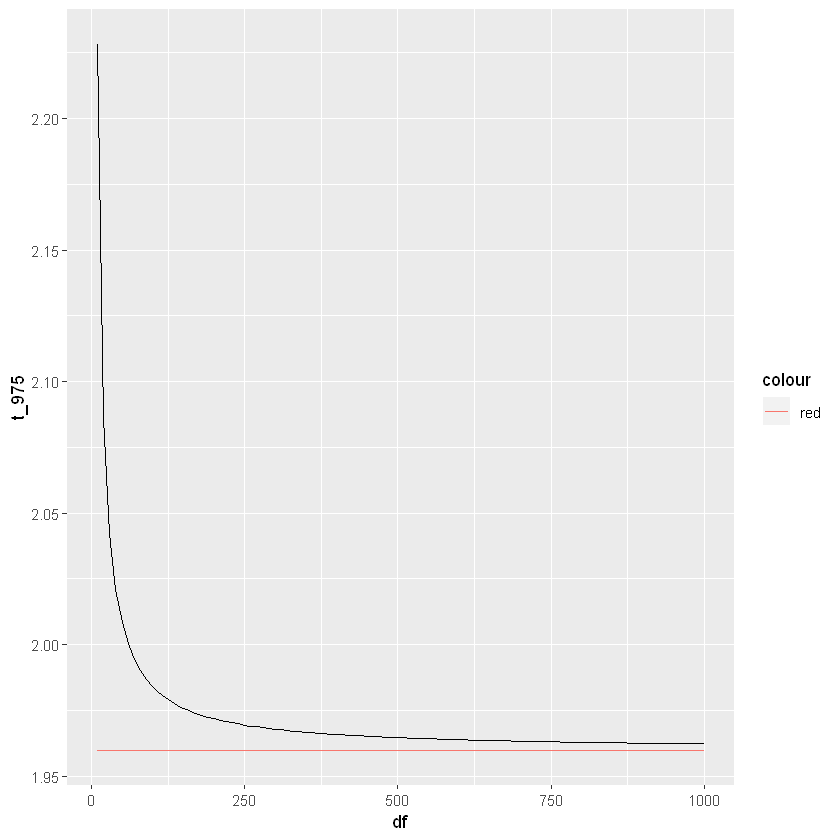

In [41]:
t_approx = data.frame(df = (1:100)*10, t_975 = qt(.975, (1:100)*10), no = rep(qnorm(.975), 100))

t_approx %>% 
  ggplot(aes(x = df, y = t_975)) +
  geom_line() + 
  geom_line(aes(df, y = no, col = "red")) 



In [42]:
qt(.975, 1:100)
qnorm(.975)

[1] 12.706205  4.302653  3.182446  2.776445  2.570582  2.446912  2.364624
  [8]  2.306004  2.262157  2.228139  2.200985  2.178813  2.160369  2.144787
 [15]  2.131450  2.119905  2.109816  2.100922  2.093024  2.085963  2.079614
 [22]  2.073873  2.068658  2.063899  2.059539  2.055529  2.051831  2.048407
 [29]  2.045230  2.042272  2.039513  2.036933  2.034515  2.032245  2.030108
 [36]  2.028094  2.026192  2.024394  2.022691  2.021075  2.019541  2.018082
 [43]  2.016692  2.015368  2.014103  2.012896  2.011741  2.010635  2.009575
 [50]  2.008559  2.007584  2.006647  2.005746  2.004879  2.004045  2.003241
 [57]  2.002465  2.001717  2.000995  2.000298  1.999624  1.998972  1.998341
 [64]  1.997730  1.997138  1.996564  1.996008  1.995469  1.994945  1.994437
 [71]  1.993943  1.993464  1.992997  1.992543  1.992102  1.991673  1.991254
 [78]  1.990847  1.990450  1.990063  1.989686  1.989319  1.988960  1.988610
 [85]  1.988268  1.987934  1.987608  1.987290  1.986979  1.986675  1.986377
 [92]  1.986086  1.985802  1.985523  1.985251  1.984984  1.984723  1.984467
 [99]  1.984217  1.983972

[1] 1.959964

## A2
RESET, $R^2$, Box-Cox-test

## A3
F-/ t-test in structurebreakmodel, prognostic Chow-test, QLR - test

## B1
nothing

## B2
Goldfeld-Quandt-test, White-test, Breusch-Pagan-test

## B3
Durbin-Watson-test, Durbin-h-test, Breusch-Godfrey-test, Hildeth-Luh, Cochrane-...